# Notes on Similarity Metrics

The last notebook on this month in the domain of collaborative filtering (CF) is to take a look at the metrics that were used in the 2 previous notebooks about [User User CF](https://github.com/caiomiyashiro/RecommenderSystemsNotebooks/blob/master/Month%202%20Part%20I%20-%20User%20User%20Collaborative%20Filtering.ipynb) and [Item Item (CF)](https://github.com/caiomiyashiro/RecommenderSystemsNotebooks/blob/master/Month%202%20Part%20II%20-%20Item%20Item%20Collaborative%20Filtering.ipynb) and analyse their properties, such as how to interpret/visualise them, when they are good or bad and if we should make any assumptions when using them.

## Metrics

The main metrics used are:

* Euclidean Distance
* Pearson Correlation
* Cosine Similarity
* Mean Centered Euclidean Distance
* Mean Centered Pearson Correlation
* Mean Centered Cosine Similarity

We are going to analyse the first three, as the other 3 are just a variant where the values are mean centered to 0. Although their interpretation and a few characteristics can change a little, the overall idea stays the same.

# Euclidean Distance

In the context of CF, the most famous used distance maps the User x Item matrix into the euclidean space and creates a vector in $\mathbb{R}^{n}$, where $n$ is the amount of items of interest. For example, in a User User CF, each user is a vector and each dimension of de vector is an item that he's recommended. If we're talking about Item Item CF, each item is a vector, and each rating it's received from an user is a dimension. The euclidean distance between two points is just the length of the straight line from the edge of vector 1 to the edge of vector 2.

<img src="images/notebook6_image1.png" width="300">

The formula is basically extracted from [Pythagorean Formula](https://en.wikipedia.org/wiki/Pythagorean_theorem), where each of the vertices now have a total lenth of ($P_{1} - P_{2}$)

$$d(p,q) = d(p,q) = \sqrt{(q_{1} - p_{1})^{2} + (q_{2} - p_{2})^{2} + ... + (q_{n} - p_{n})^{2}} =  \sqrt{\sum_{i=1}^{n}(p_{i} - q_{i})^{2}}$$

The euclidean distance **is scale dependent**, *i.e.*, it considers the direction **and** the magnitude of the vector, which is not the case for the cosine similarity, for example. There are cases where we want to consider the magnitude as well, such as in cluster operations. It doens't matter for the cluster algorithm if two points (vectors) are pointing to the same direction, but it matters if their 'physical' distance (euclidean) is small.
  
On other cases, this physical distance might not be desired, as we only want to check if two arrays are pointing to the same direction. This case is highlighted here in recommender systems. In this domain, we are interested in how two vectors vary together in a linear fashion, and not their total distance. In graphical terms, we want these two vectors to have the same similarity, even though they have different magnitudes. We're still going to take a look at the cosine similarity, but for now it is enough to say that the closest to 1 the better.



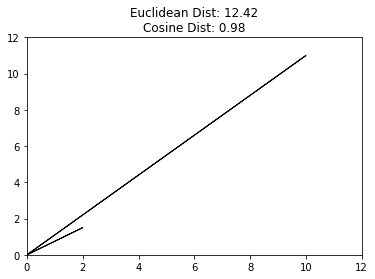

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

arrayA = np.array([2,1.5]); arrayB = np.array([10,11]);

plt.arrow(x = 0, y = 0, dx = arrayA[0], dy = arrayA[1]); plt.arrow(x = 0, y = 0, dx = arrayB[0], dy = arrayB[1])
plt.xlim(0,12); plt.ylim(0,12);

euclideanDistance = np.sqrt(np.sum((arrayA - arrayB)**2))
cosineSim = np.dot(arrayA, arrayB)/(np.linalg.norm(arrayA) * np.linalg.norm(arrayB))

plt.title('Euclidean Dist: ' + str(round(euclideanDistance,2)) + '\n' +
         'Cosine Dist: ' + str(round(cosineSim,2)));

## Euclidean Space in High Dimensions

Depending on the application, there might be a limit where you should use the euclidean distance, even if it makes sense for the application and if it works for a sample dataset. 

In [55]:
%%time
nbrVariables = 1000
nbrDimensions = np.arange(1000,100000,1000)
mu, sigma = 100, 50

distanceRatios = []
for nbrDimension in nbrDimensions:
    variables = np.random.normal(mu, sigma, [1000,nbrDimension])
    distances = pd.DataFrame(euclidean_distances(variables))
    minValue = min(distances.apply(lambda col : min(col[col != 0])))
    maxValue = max(distances.apply(lambda col : max(col[col != 0])))
    distanceRatios.append(minValue/maxValue)


CPU times: user 13min 21s, sys: 18.3 s, total: 13min 40s
Wall time: 9min 15s


Text(0,0.5,'Ratio Min/Max Distance')

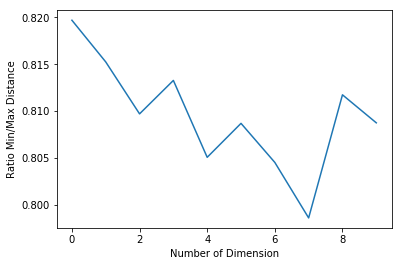

In [66]:
plt.plot(distanceRatios)
plt.xlabel('Number of Dimension')
plt.ylabel('Ratio Min/Max Distance')
plt.title('Convergence of distances for High Dimensions');

# Mean Centered Euclidean Distance

# Pearson Correlation

The pearson correlation coefficient comes from the covariance factor between two variables and normalised to have a bounded value between 0 and 1. It answers the following question: **How much linear correlated** the variables $x$ and $y$ are? As the values are normalised, its possible to have some guidelines for the coefficient value, such as:

* Exactly 1. A perfect uphill (positive) linear relationship
* 0.70. A strong uphill (positive) linear relationship
* 0.50. A moderate uphill (positive) linear relationship
* 0.30. A weak uphill (positive) linear relationship
* 0 no **linear** relationship, neither positive nor negative
* The same for negative values

The value comes from dividing the covariance between variables $x$ and $y$ and dividing it by the product of $x$ and $y$ standard deviations:

$$r_{x,y} = \frac{S_{xy}}{S_{x}S_{y}}\hspace{7.0cm}$$

$$= \frac{\frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n-1}}{\frac{\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}}{n-1}  \frac{\sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y}})^{2}}{n-1}}\hspace{4.5cm}(1)$$

$$= \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}  {\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}} \sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}}\hspace{3cm}(2)$$

Lets take a look first at equation (1):

- Nominator: It basically extracts the following info:
    - For a covariance value of $c$. In average, a dislocation in 1 unit from the mean value in $x$ represent a dislocation in $c^{2}$ units in $y$.
    - Differently from the 1 variable standard deviation = square root of the variance, we don't take square roots from the covariance values, as it is still not easily understandable. For example, the covariance output would be in the unit $x^{2}y^{2}$ and taking the square root would still be on the unit $xy$. Instead of finding a a proper valid unit transformation, people tend to go directly to a unitless variable, the correlation.
      
      
      
- Denominator: Normalisation factor to transform the output between -1 and 1

# Mean Centered Pearson Correlation

# Cosine Similarity

# Mean Centered Cosine Similarity

# Notes on the Pearson Correlation Coefficient

## Similarity between Pearson and Cosine Similarity